In [ ]:
! pip install scikit-fuzzy


     |████████████████████████████████| 1.0MB 6.9MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894071 sha256=5ea5534eee4bd4236c3889456b07b88fb8ade93bae3a3e0353416a181b0f09a6
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


the answer is
14.607391119854956


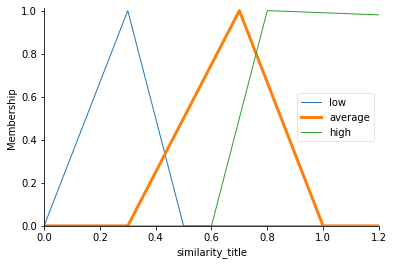

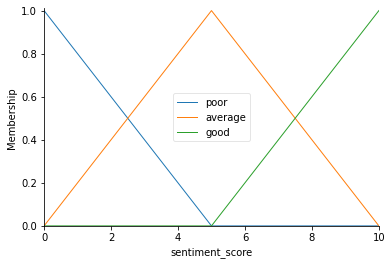

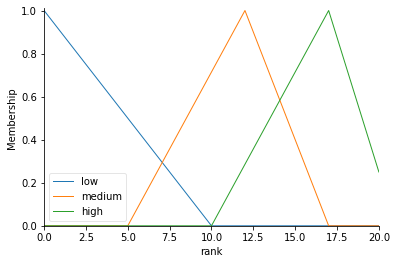

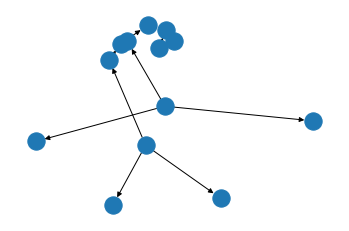

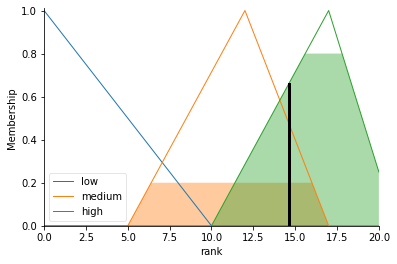

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedent/Consequents functions
similarity_title = ctrl.Antecedent(np.arange(0, 1.25, .1), 'similarity_title')
sentiment_score = ctrl.Antecedent(np.arange(0, 11, 1), 'sentiment_score')
rank = ctrl.Consequent(np.arange(0, 21, 1), 'rank')

 
similarity_title['low'] = fuzz.trimf(similarity_title.universe, [0, 0.3, 0.5])
similarity_title['average'] = fuzz.trimf(similarity_title.universe, [0.3, 0.7, 1])
similarity_title['high'] = fuzz.trimf(similarity_title.universe, [0.6, 0.8, 21])


sentiment_score.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
rank['low'] = fuzz.trimf(rank.universe, [0, 0, 10])
rank['medium'] = fuzz.trimf(rank.universe, [5, 12, 17])
rank['high'] = fuzz.trimf(rank.universe, [10, 17, 21])


similarity_title['average'].view()
sentiment_score.view()
rank.view()


rule1 = ctrl.Rule(similarity_title['low'] | sentiment_score['poor'], rank['low'])
rule2 = ctrl.Rule(sentiment_score['average'], rank['medium'])
rule3 = ctrl.Rule(sentiment_score['good'] | quality['good'], rank['high'])

rule1.view()

rankFIS = ctrl.ControlSystem([rule1, rule2, rule3])
rankFIS = ctrl.ControlSystemSimulation(rankFIS)
rankFIS.input['similarity_title'] = 0.5
rankFIS.input['sentiment_score'] = 9

# Crunch the numbers
rankFIS.compute()
print ("the answer is") 
print (rankFIS.output['rank'])
rank.view(sim=rankFIS)



In [ ]:
!pip install spacy

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
introduction_text = ('This tutorial is about Natural Language Processing in Spacy.')
introduction_doc = nlp(introduction_text)
# Extract tokens for the given doc
print ([token.text for token in introduction_doc])
['This', 'tutorial', 'is', 'about', 'Natural', 'Language',
'Processing', 'in', 'Spacy', '.']


['This', 'tutorial', 'is', 'about', 'Natural', 'Language', 'Processing', 'in', 'Spacy', '.']


['This',
 'tutorial',
 'is',
 'about',
 'Natural',
 'Language',
 'Processing',
 'in',
 'Spacy',
 '.']

a developer beautiful and great conference
6
21 July
2
London
1
Main chunk is:   a developer beautiful and great conference
a developer beautiful and great conference
a developer beautiful and great conference
6
21 July
2
London
1
Main chunk is:   a developer beautiful and great conference
the similarity between sentences is 0.2682972073615654
Sentiment 0.0


/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


Counter({'NOUN': 2, 'ADJ': 2, 'ADP': 2, 'NUM': 2, 'PROPN': 2, 'PRON': 1, 'AUX': 1, 'DET': 1, 'CCONJ': 1, 'VERB': 1, 'PUNCT': 1})
Noun count 11.76470588235294
Counter({'NOUN': 2, 'ADJ': 2, 'ADP': 2, 'NUM': 2, 'PROPN': 2, 'PRON': 1, 'AUX': 1, 'DET': 1, 'CCONJ': 1, 'VERB': 1, 'PUNCT': 1})
Verb count 5.88235294117647
Counter({'NOUN': 2, 'ADJ': 2, 'ADP': 2, 'NUM': 2, 'PROPN': 2, 'PRON': 1, 'AUX': 1, 'DET': 1, 'CCONJ': 1, 'VERB': 1, 'PUNCT': 1})
Adj count 11.76470588235294
Sentiment 0.0
Counter({'NOUN': 2, 'ADJ': 2, 'ADP': 2, 'NUM': 2, 'PROPN': 2, 'PRON': 1, 'AUX': 1, 'DET': 1, 'CCONJ': 1, 'VERB': 1, 'PUNCT': 1})
Counter({'NOUN': 2, 'ADJ': 2, 'ADP': 2, 'NUM': 2, 'PROPN': 2, 'PRON': 1, 'AUX': 1, 'DET': 1, 'CCONJ': 1, 'VERB': 1, 'PUNCT': 1})
Counter({'NOUN': 2, 'ADJ': 2, 'ADP': 2, 'NUM': 2, 'PROPN': 2, 'PRON': 1, 'AUX': 1, 'DET': 1, 'CCONJ': 1, 'VERB': 1, 'PUNCT': 1})
the answer is
8.776502813852339


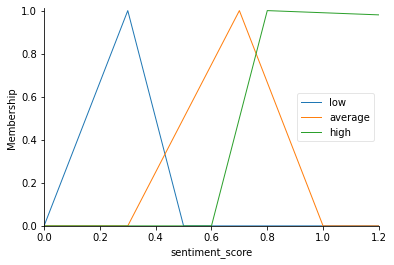

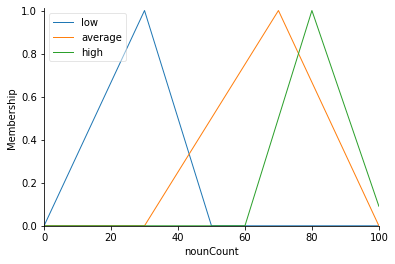

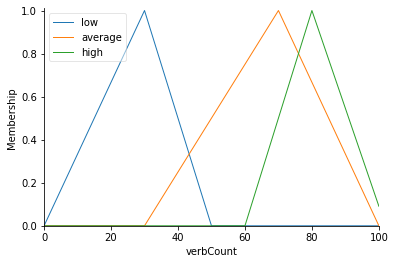

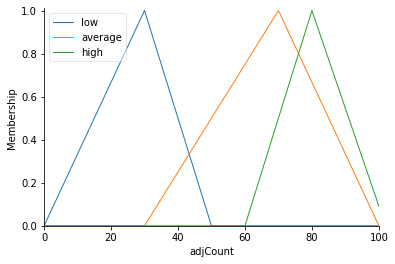

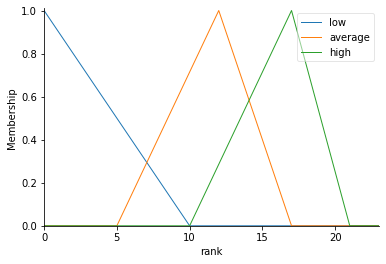

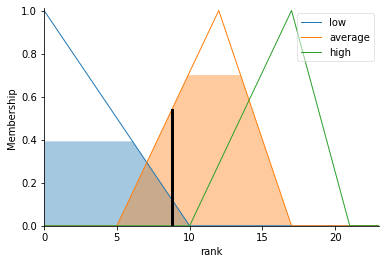

In [ ]:
from __future__ import unicode_literals
import spacy,en_core_web_sm
from collections import Counter
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl




matcher = Matcher(nlp.vocab)

def getMainNounChuck(inputSentence):
  lenChunk = 0
  prevLen = -1
  mainChunk = ""
  for chunk in inputSentence.noun_chunks:
       lenChunk =  len(chunk)
       print (chunk) 
       print(lenChunk)
       if prevLen < lenChunk:
         mainChunk = chunk
         prevLen = lenChunk

  print("Main chunk is:  ", mainChunk)
  return mainChunk


def getSentimentScoreOfChunk(doc):
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]
        span = doc[start:end]
    print("Sentiment", doc.sentiment * 10)
    return doc.sentiment * 10


def getSimilarity(doc1, doc2):
  return doc1.similarity(doc2)



def getPOSCOUNT(inputText, posTag):
  nlp = en_core_web_sm.load()

  count = 0 
  for token in nlp(inputText):
    count +=1 

  dictT= (Counter(([token.pos_ for token in nlp(inputText)])))
  print(dictT)
  return dictT[posTag]/(count+1) * 100


title = ('Financial London situations.') 
text = ('There is a developer beautiful and great conference happening on 21 July 2019 in London.')
doc = nlp(text)
print(getMainNounChuck(doc))
print("the similarity between sentences is", getSimilarity(nlp(title),getMainNounChuck(doc)))
getSentimentScoreOfChunk(doc)
print("Noun count" , getPOSCOUNT(text,"NOUN")) 
print("Verb count", getPOSCOUNT(text,"VERB"))
print("Adj count", getPOSCOUNT(text,"ADJ"))


#simWithNounChunk =  getSimilarity(doc,doc)
#sentimentScore = getSentimentScoreOfChunk(doc)
#nounCount=  getPOSCOUNT(text,"NOUN")
#verbCount =  getPOSCOUNT(text,"VERB")
#adjCount =  getPOSCOUNT(text,"ADJ")



###########################################
## fuzzy inference engine
###########################################




# Antecedent/Consequents functions
similarity_title = ctrl.Antecedent(np.arange(0, 1.25, .1), 'similarity_title')
sentiment_score = ctrl.Antecedent(np.arange(0,  1.25, .1), 'sentiment_score')
nounCount = ctrl.Antecedent(np.arange(0, 110, 10), 'nounCount')
verbCount  = ctrl.Antecedent(np.arange(0, 110, 10), 'verbCount')
adjCount  =  ctrl.Antecedent(np.arange(0, 110, 10), 'adjCount')
rank = ctrl.Consequent(np.arange(0, 24, 1), 'rank')


similarity_title['low'] = fuzz.trimf(similarity_title.universe, [0, 0.3, 0.5])
similarity_title['average'] = fuzz.trimf(similarity_title.universe, [0.3, 0.7, 1])
similarity_title['high'] = fuzz.trimf(similarity_title.universe, [0.6, 0.8, 21])

sentiment_score['low'] = fuzz.trimf(sentiment_score.universe, [0, 0.3, 0.5])
sentiment_score['average'] = fuzz.trimf(sentiment_score.universe, [0.3, 0.7, 1])
sentiment_score['high'] = fuzz.trimf(sentiment_score.universe, [0.6, 0.8, 21])


  
nounCount['low'] = fuzz.trimf(nounCount.universe, [0, 30, 50])
nounCount['average'] = fuzz.trimf(nounCount.universe, [30, 70, 100])
nounCount['high'] = fuzz.trimf(nounCount.universe, [60, 80, 102])

verbCount['low'] = fuzz.trimf(verbCount.universe, [0, 30, 50])
verbCount['average'] = fuzz.trimf(verbCount.universe, [30, 70, 100])
verbCount['high'] = fuzz.trimf(verbCount.universe, [60, 80, 102])


adjCount['low'] = fuzz.trimf(adjCount.universe, [0, 30, 50])
adjCount['average'] = fuzz.trimf(adjCount.universe, [30, 70, 100])
adjCount['high'] = fuzz.trimf(adjCount.universe, [60, 80, 102])


# membership functions rank
rank['low'] = fuzz.trimf(rank.universe, [0, 0, 10])
rank['average'] = fuzz.trimf(rank.universe, [5, 12, 17])
rank['high'] = fuzz.trimf(rank.universe, [10, 17, 21])


sentiment_score.view()
nounCount.view()
verbCount.view()
adjCount.view()
rank.view()


rule1 = ctrl.Rule(similarity_title['low'] | sentiment_score['low'], rank['low'])
rule2 = ctrl.Rule(sentiment_score['average'], rank['average'])
rule3 = ctrl.Rule(sentiment_score['average'] | quality['average'], rank['average'])
rule4 = ctrl.Rule(nounCount['low'] | verbCount['low'], rank['low'])
rule5 = ctrl.Rule(similarity_title['low']  | nounCount["high"] | verbCount["high"] | adjCount["high"] , rank['high'])
rule6 = ctrl.Rule( nounCount["high"] & sentiment_score['high'] & verbCount["high"] & adjCount["high"] , rank['high'])
rule7 = ctrl.Rule(similarity_title['high']   & sentiment_score['high'] & verbCount["high"] & adjCount["high"] , rank['high'])
rule8 = ctrl.Rule(similarity_title['high']  & nounCount["high"]  & verbCount["high"] & adjCount["high"] , rank['high'])
rule9 = ctrl.Rule(similarity_title['high']  & nounCount["high"] & sentiment_score['high']  & adjCount["high"] , rank['high'])
rule10 = ctrl.Rule(similarity_title['high']  & nounCount["high"] & sentiment_score['high'] & verbCount["high"]  , rank['high'])



rankFIS = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
rankFIS = ctrl.ControlSystemSimulation(rankFIS)
 
 
rankFIS.input['similarity_title'] =  getSimilarity(doc,doc)
rankFIS.input['sentiment_score'] = getSentimentScoreOfChunk(doc)
rankFIS.input['nounCount']  =  getPOSCOUNT(text,"NOUN")
rankFIS.input['verbCount']  =  getPOSCOUNT(text,"VERB")
rankFIS.input['adjCount']  =  getPOSCOUNT(text,"ADJ")

rankFIS.compute()
print ("the answer is") 
print (rankFIS.output['rank'])
rank.view(sim=rankFIS)



In [ ]:
from __future__ import unicode_literals
import spacy,en_core_web_sm
from collections import Counter

nlp = en_core_web_sm.load()

dict1= (Counter(([token.pos_ for token in nlp('The cat sat on the mat.')])))
dict1["DET"]
print(dict1)

Counter({'DET': 2, 'NOUN': 2, 'VERB': 1, 'ADP': 1, 'PUNCT': 1})


In [ ]:
import spacy
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)

def set_sentiment(matcher, doc, i, matches):
    doc.sentiment += 0.1

myemotionalwordlist = ['you','superb','great','free']

sentence0 = 'You are a superb great free person'
sentence1 = 'You are a great person'
sentence2 = 'Rocks are made o minerals'

sentences = [sentence0,sentence1,sentence2]

pattern2 = [[{"ORTH": emotionalword, "OP": "+"}] for emotionalword in myemotionalwordlist]
matcher.add("Emotional", set_sentiment, *pattern2)  # Match one or more emotional word

for sentence in sentences:
    doc = nlp(sentence)
    matches = matcher(doc)

    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]
        span = doc[start:end]
    print("Sentiment", doc.sentiment)


Sentiment 0.30000001192092896
Sentiment 0.10000000149011612
Sentiment 0.0
